In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

import config
import spotipy
from IPython.display import IFrame
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.preprocessing import StandardScaler
import pickle

from bs4 import BeautifulSoup
import requests
import re


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets

import warnings
warnings.filterwarnings("ignore", message="The default value of `n_init` will change", category=FutureWarning)

# Web Scraping. Billboard hot 100 songs

In [66]:
url = "https://www.billboard.com/charts/hot-100/"

In [67]:
response = requests.get(url)
response

<Response [200]>

In [68]:
soup = BeautifulSoup(response.content, 'html.parser')

In [69]:
response.headers

{'Server': 'nginx', 'Date': 'Wed, 09 Apr 2025 16:22:41 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-hacker': "If you're reading this, you should visit wpvip.com/careers and apply to join the fun, mention this header.", 'X-Powered-By': 'WordPress VIP <https://wpvip.com>', 'Host-Header': 'a9130478a60e5f9135f765b23f26593b', 'X-UA-Compatible': 'IE=Edge', 'Content-Security-Policy': "frame-ancestors 'billboardplayback.com' 'onunblocked.com' 'billboard-staging.nftco.com', upgrade-insecure-requests", 'Sec-Fetch-Site': 'cross-site', 'Access-Control-Allow-Origin': 'https://billboardplayback.com/', 'Content-Security-Policy-Report-Only': "default-src data: 'unsafe-inline' 'unsafe-eval' https: blob: http://*.files.wordpress.com wss://www.billboard.com; report-uri https://pmcuri.report-uri.com/r/d/csp/reportOnly", 'Link': '<https://www.billboard.com/wp-json/>; rel="https://api.w.org/", <https://www.billboa

# Artist Lists

In [70]:
artist_list = soup.find_all("span", class_= "c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only")
#artist_list

In [71]:
artist_names = [artist.get_text(strip=True) for artist in artist_list]
artist_names

['Lady Gaga & Bruno Mars',
 'Drake',
 'Shaboozey',
 'Chappell Roan',
 'Teddy Swims',
 'ROSE & Bruno Mars',
 'Morgan Wallen',
 'Morgan Wallen',
 'Billie Eilish',
 'Benson Boone',
 'Doechii',
 'Gracie Abrams',
 'Alex Warren',
 'Kendrick Lamar',
 'Kendrick Lamar Featuring Lefty Gunplay',
 'Morgan Wallen',
 'Ariana Grande',
 'Post Malone Featuring Morgan Wallen',
 'Sabrina Carpenter',
 'Leon Thomas',
 'Lola Young',
 'Kendrick Lamar',
 'SZA With Kendrick Lamar',
 'Tate McRae',
 'The Weeknd & Playboi Carti',
 'Sabrina Carpenter',
 'Lil Tecca',
 'Chappell Roan',
 'Morgan Wallen',
 'Zach Top',
 'Myles Smith',
 'Lady Gaga',
 'Doechii',
 'Playboi Carti & The Weeknd',
 'The Marias',
 'Chappell Roan',
 'Ariana Grande',
 'Gigi Perez',
 'Teddy Swims',
 'Bad Bunny',
 'Ariana Grande',
 'Sabrina Carpenter',
 'Sam Barber Featuring Avery Anna',
 'Riley Green',
 'Billie Eilish',
 'Benson Boone',
 'SZA',
 'Chris Brown',
 'Playboi Carti',
 'Shaboozey',
 'The Weeknd',
 'Ariana Grande',
 'Ariana Grande',
 'Fu

In [72]:
len(artist_names)

99

In [73]:
first_artist_tag = soup.find("span", class_="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet")
first_artist_tag

<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
	
	Kendrick Lamar &amp; SZA
</span>

In [74]:
first_artist_name = first_artist_tag.get_text(strip=True) if first_artist_tag else None
first_artist_name

'Kendrick Lamar & SZA'

In [75]:
total_artist = [first_artist_name] + artist_names
total_artist

['Kendrick Lamar & SZA',
 'Lady Gaga & Bruno Mars',
 'Drake',
 'Shaboozey',
 'Chappell Roan',
 'Teddy Swims',
 'ROSE & Bruno Mars',
 'Morgan Wallen',
 'Morgan Wallen',
 'Billie Eilish',
 'Benson Boone',
 'Doechii',
 'Gracie Abrams',
 'Alex Warren',
 'Kendrick Lamar',
 'Kendrick Lamar Featuring Lefty Gunplay',
 'Morgan Wallen',
 'Ariana Grande',
 'Post Malone Featuring Morgan Wallen',
 'Sabrina Carpenter',
 'Leon Thomas',
 'Lola Young',
 'Kendrick Lamar',
 'SZA With Kendrick Lamar',
 'Tate McRae',
 'The Weeknd & Playboi Carti',
 'Sabrina Carpenter',
 'Lil Tecca',
 'Chappell Roan',
 'Morgan Wallen',
 'Zach Top',
 'Myles Smith',
 'Lady Gaga',
 'Doechii',
 'Playboi Carti & The Weeknd',
 'The Marias',
 'Chappell Roan',
 'Ariana Grande',
 'Gigi Perez',
 'Teddy Swims',
 'Bad Bunny',
 'Ariana Grande',
 'Sabrina Carpenter',
 'Sam Barber Featuring Avery Anna',
 'Riley Green',
 'Billie Eilish',
 'Benson Boone',
 'SZA',
 'Chris Brown',
 'Playboi Carti',
 'Shaboozey',
 'The Weeknd',
 'Ariana Grande

In [76]:
len(total_artist)

100

# Song List

In [77]:
song_list = soup.find_all("ul", class_="lrv-a-unstyle-list lrv-u-flex lrv-u-height-100p lrv-u-flex-direction-column@mobile-max")
#song_list

In [78]:
song_names = []
for song in song_list:
    song_name_tag = song.find("h3")
    if song_name_tag:
        song_name = song_name_tag.get_text(strip=True)
        song_names.append(song_name)
song_names

['Luther',
 'Die With A Smile',
 'Nokia',
 'A Bar Song (Tipsy)',
 'Pink Pony Club',
 'Lose Control',
 'APT.',
 'Just In Case',
 "I'm The Problem",
 'Birds Of A Feather',
 'Beautiful Things',
 'Anxiety',
 "That's So True",
 'Ordinary',
 'Not Like Us',
 'TV Off',
 'Love Somebody',
 'Twilight Zone',
 'I Had Some Help',
 'Espresso',
 'Mutt',
 'Messy',
 'Squabble Up',
 '30 For 30',
 'Sports Car',
 'Timeless',
 'Taste',
 'Dark Thoughts',
 'The Giver',
 "I'm A Little Crazy",
 'I Never Lie',
 'Stargazing',
 'Abracadabra',
 'Denial Is A River',
 'Rather Lie',
 'No One Noticed',
 'Good Luck, Babe!',
 'Dandelion',
 'Sailor Song',
 'Bad Dreams',
 'DTMF',
 'Intro (End Of The World)',
 'Bed Chem',
 'Indigo',
 'Worst Way',
 'Wildflower',
 "Sorry I'm Here For Someone Else",
 'BMF',
 'Residuals',
 'Evil J0rdan',
 'Good News',
 'Cry For Me',
 'Past Life',
 'Warm',
 'Me Jalo',
 'Ojos Tristes',
 'Baile Inolvidable',
 'Smile',
 'Hampstead',
 'Call Me When You Break Up',
 'Revolving Door',
 'Gimme A Hug',
 

In [79]:
len(song_names)

100

In [80]:
billboard_df = {'Artist': total_artist,'Song': song_names}
pd.DataFrame(billboard_df)

,Artist,Song
0,Kendrick Lamar & SZA,Luther
1,Lady Gaga & Bruno Mars,Die With A Smile
2,Drake,Nokia
3,Shaboozey,A Bar Song (Tipsy)
4,Chappell Roan,Pink Pony Club
...,...,...
95,Lil Durk,Keep On Sippin'
96,Imogen Heap,Headlock
97,Ella Mai,Little Things
98,Tito Double P,Tattoo


In [81]:
#df = pd.DataFrame(billboard_df)
#df.to_csv('billboard_100.csv', index=False)

# Data Cleaning and Wrangling for audio_features data frame

In [82]:
audio_features = pd.read_csv("/Users/admin/Downloads/project/project_week_11/song_recommender_final /audio_features_dataset_curated.csv")
audio_features

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
42996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
42997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
42998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [83]:
audio_features.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,43000.000000,43000.000000,4.300000e+04,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000
mean,56941.360465,34.185953,2.308603e+05,0.575395,0.632784,5.346023,-7.915923,0.645512,0.071418,0.299402,0.118132,0.196259,0.482026,121.216687,3.910814
std,35333.440394,25.826649,9.285463e+04,0.166243,0.241942,3.559531,4.712412,0.478364,0.072019,0.322864,0.276817,0.172004,0.251098,29.360603,0.392699
min,0.000000,0.000000,0.000000e+00,0.000000,0.000020,0.000000,-43.043000,0.000000,0.000000,0.000001,0.000000,0.009860,0.000000,0.000000,0.000000
25%,25749.750000,1.000000,1.811060e+05,0.465000,0.475000,2.000000,-9.400000,0.000000,0.034300,0.022000,0.000000,0.096200,0.275000,97.937000,4.000000
50%,57499.500000,39.000000,2.168035e+05,0.587000,0.674000,6.000000,-6.749000,1.000000,0.045500,0.155000,0.000016,0.125000,0.472000,121.390500,4.000000
75%,88249.250000,54.000000,2.613592e+05,0.700000,0.832000,8.000000,-4.942000,1.000000,0.073700,0.546000,0.006942,0.242000,0.684000,139.950000,4.000000
max,113999.000000,100.000000,3.601693e+06,0.975000,1.000000,11.000000,1.821000,1.000000,0.924000,0.996000,1.000000,0.994000,0.995000,243.372000,5.000000


In [84]:
audio_features.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [85]:
missing_values = audio_features.isnull().sum()
print(missing_values)

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


In [86]:
audio_features.drop('Unnamed: 0', axis=1, inplace=True)

In [87]:
audio_features.nunique()

track_id            34478
artists             12562
album_name          17915
track_name          27352
popularity            101
duration_ms         22332
explicit                2
danceability          932
energy               1572
key                    12
loudness            12582
mode                    2
speechiness          1229
acousticness         3956
instrumentalness     4772
liveness             1623
valence              1559
tempo               21252
time_signature          5
dtype: int64

In [88]:
audio_features.dropna(how='any',inplace=True)

In [89]:
audio_features.drop_duplicates(inplace=True)
audio_features

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


# Machine Learning. Unsupervised Methods

In [90]:
af = audio_features[['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness',
                    'valence','time_signature']]
af

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,time_signature
0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.7150,4
1,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.2670,4
2,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1200,4
3,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1430,3
4,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.1670,4
...,...,...,...,...,...,...,...,...,...
42995,0.172,0.2350,-16.393,1,0.0422,0.6400,0.928000,0.0339,5
42996,0.174,0.1170,-18.318,0,0.0401,0.9940,0.976000,0.0350,4
42997,0.629,0.3290,-10.895,0,0.0420,0.8670,0.000000,0.7430,4
42998,0.587,0.5060,-10.889,1,0.0297,0.3810,0.000000,0.4130,4


- Standard Scaler 

In [91]:
scaler = StandardScaler()
audio_features_scaled = scaler.fit_transform(af)

In [92]:
audio_features_scaled 

array([[ 0.63629227, -0.65293408,  0.28702676, ..., -0.45788718,
         0.96032   ,  0.22970346],
       [-0.89815129, -1.84460993, -1.85657016, ..., -0.45787169,
        -0.80602088,  0.22970346],
       [-0.79026072, -1.06497115, -0.3236194 , ..., -0.45789061,
        -1.38560148,  0.22970346],
       ...,
       [ 0.35457803, -1.18615853, -0.56088855, ..., -0.45789061,
         1.07071631,  0.22970346],
       [ 0.10283338, -0.47115301, -0.55966235, ..., -0.45789061,
        -0.23038301,  0.22970346],
       [-0.26279575, -0.54790502, -0.41967151, ..., -0.45789061,
         0.93272092,  0.22970346]])

- K-Means Clustering 

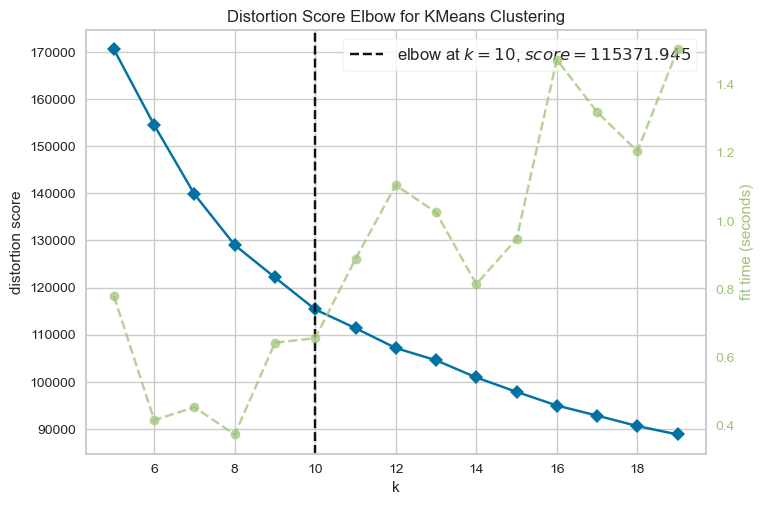

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(5,20))
visualizer.fit(audio_features_scaled)
visualizer.poof()

In [94]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(audio_features_scaled )
labels

array([4, 1, 1, ..., 0, 0, 0], dtype=int32)

In [95]:
score = silhouette_score(audio_features_scaled, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.20251471599794707


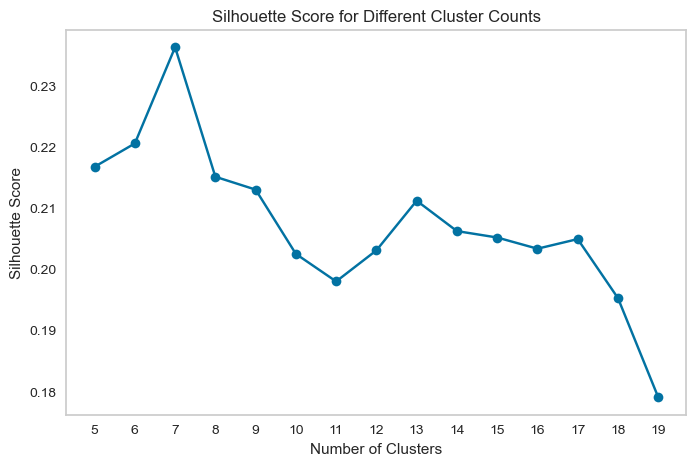

In [96]:
cluster_range = range(5, 20)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters = n_clusters, random_state=42, n_init = 5)
    cluster_labels = kmeans.fit_predict(audio_features_scaled)
    
    #pickling
    filename = "pickles/kmeans_" + str(n_clusters) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    score = silhouette_score(audio_features_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.xticks(cluster_range)
plt.grid()
plt.show()

# Adding Cluster_ID to the features chosen from audio_features dataset

In [97]:
af = af.copy()  
af.loc[:, 'cluster_id'] = labels
af

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,time_signature,cluster_id
0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.7150,4,4
1,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.2670,4,1
2,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1200,4,1
3,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1430,3,7
4,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.1670,4,1
...,...,...,...,...,...,...,...,...,...,...
42995,0.172,0.2350,-16.393,1,0.0422,0.6400,0.928000,0.0339,5,2
42996,0.174,0.1170,-18.318,0,0.0401,0.9940,0.976000,0.0350,4,2
42997,0.629,0.3290,-10.895,0,0.0420,0.8670,0.000000,0.7430,4,0
42998,0.587,0.5060,-10.889,1,0.0297,0.3810,0.000000,0.4130,4,0


- cluster statistics 

In [98]:
af.groupby('cluster_id').mean()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,time_signature
cluster_id,,,,,,,,,
0,0.648953,0.484801,-9.047474,0.919457,0.048880,0.572314,0.017200,0.594171,3.995578
1,0.455732,0.327308,-11.107243,0.790931,0.039026,0.730687,0.027669,0.262343,4.040185
2,0.363587,0.142709,-21.995647,0.645742,0.047189,0.915281,0.821490,0.223931,3.798581
3,0.465502,0.757699,-5.850337,0.964347,0.057974,0.090655,0.022705,0.337839,3.980021
4,0.626323,0.752215,-5.964813,0.000000,0.067144,0.141029,0.021802,0.554784,3.990865
5,0.671713,0.781669,-5.724518,1.000000,0.064237,0.124999,0.018563,0.724660,3.991327
6,0.690633,0.686428,-6.655039,0.511541,0.320844,0.273489,0.038740,0.574962,4.010735
7,0.434352,0.386354,-10.330769,0.764278,0.042518,0.611700,0.039223,0.323880,3.000000
8,0.426962,0.366266,-13.460300,0.703583,0.068706,0.668602,0.279505,0.343438,0.964169


# Adding Cluster_ID to original dataframe audio_features

In [99]:
audio_features = audio_features.copy()  
audio_features.loc[:, 'cluster_id'] = labels
audio_features

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster_id
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,1
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,1
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,7
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,2
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,2
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,0
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,0


# Cluster Labels and Song recommender for audio_features

In [100]:
cluster_labels_mapping = {
    0: "Mellow Grooves",
    1: "Acoustic Chill",
    2: "Ambient",
    3: "Energetic Upbeat",
    4: "Pop",
    5: "Party Beats",
    6: "Balanced Beats",
    7: "Soulful Sounds",
    8: "Smooth tunes",
    9: "rock and pop" 
}
audio_features['cluster_label'] = audio_features['cluster_id'].map(cluster_labels_mapping)

In [101]:
audio_features

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster_id,cluster_label
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,4,Pop
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,1,Acoustic Chill
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,1,Acoustic Chill
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,7,Soulful Sounds
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,1,Acoustic Chill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,2,Ambient
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,2,Ambient
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,0,Mellow Grooves
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,0,Mellow Grooves


In [102]:
audio_features.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster_id,cluster_label
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,4,Pop
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,1,Acoustic Chill
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,1,Acoustic Chill
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,7,Soulful Sounds
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1,Acoustic Chill


In [103]:
audio_features['cluster_label'].unique()

array(['Pop', 'Acoustic Chill', 'Soulful Sounds', 'Mellow Grooves',
       'Energetic Upbeat', 'Party Beats', 'Ambient', 'Smooth tunes',
       'rock and pop', 'Balanced Beats'], dtype=object)

In [104]:
#df = pd.DataFrame(audio_features)
#df.to_csv('audio_features_cluster.csv', index=False) 

In [105]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=config.client_id, client_secret=config.client_secret))

In [119]:
def get_user_preference():
    preference = input("Enter a music type: Mellow Grooves,Acoustic Chill, Ambient, Energetic Upbeat, Pop, Party Beats, Balanced Beats, Soulful Sounds, Smooth Tunes,Rock and Pop: ").strip().lower()
    return preference

def recommend_song(preference, audio_features):
    valid_categories = ["mellow grooves", "acoustic chill", "ambient", "energetic upbeat", "pop","party beats", "balanced beats", "soulful sounds", "smooth tunes", "rock and pop"]

    
    if preference in valid_categories:
        song = audio_features.sample(n=1).iloc[0]
        print(f"Check out this recommended song: \"{song['track_name']}\" by {song['artists']}")
        query = f"track:{song['track_name']} artist:{song['artists']}"
        results = sp.search(q=query, type='track', limit=1)
        
        if results['tracks']['items']:
            track_id = results['tracks']['items'][0]['id']
            display(IFrame(src=f"https://open.spotify.com/embed/track/{track_id}",
                   width="320", height="80", frameborder="0",
                   allowtransparency="true", allow="encrypted-media"))
        else:
            print("Could not find the track on Spotify.")
    else:
        print(f"You selected '{preference}'. Stay tuned for recommendations in this category!")

preference = get_user_preference()
recommend_song(preference, audio_features)

Enter a music type: Mellow Grooves,Acoustic Chill, Ambient, Energetic Upbeat, Pop, Party Beats, Balanced Beats, Soulful Sounds, Smooth Tunes,Rock and Pop:  ambient


Check out this recommended song: "以心伝心" by 19


# Billboard Hot 100 Songs data frame and Songs Recommender 

In [107]:
df= pd.read_csv ("/Users/admin/Downloads/project/project_week_11/song_recommender_final /billboard_100.csv")
df

,artist,song
0,Kendrick Lamar & SZA,Luther
1,Lady Gaga & Bruno Mars,Die With A Smile
2,Kendrick Lamar,Not Like Us
3,Kendrick Lamar Featuring Lefty Gunplay,TV Off
4,Shaboozey,A Bar Song (Tipsy)
...,...,...
95,LISA Featuring Doja Cat & RAYE,Born Again
96,Giveon,Twenties
97,PARTYNEXTDOOR,Deeper
98,Bailey Zimmerman,Holy Smokes


In [108]:
def get_user_preference(df):
    return input("Enter a music type: High Energy, Chill Vibes, Rock, Trending Now:").strip().lower()

def recommend_song(preference):
    if preference == "trending now":
        song = df.sample(n=1).iloc[0]
        print(f"Check out this trending song: \"{song['song']}\" by {song['artist']}")
        
        # Retrieve and play track from Spotify
        query = f"track:{song['song']} artist:{song['artist']}"
        results = sp.search(q=query, type='track', limit=1)
        if results['tracks']['items']:
            track_id = results['tracks']['items'][0]['id']
            display(IFrame(src=f"https://open.spotify.com/embed/track/{track_id}",
                   width="320", height="80", frameborder="0",
                   allowtransparency="true", allow="encrypted-media"))
        else:
            print("Could not find the track on Spotify.")
    else:
        print(f"You selected '{preference}'. Stay tuned for recommendations in this category!")


recommend_song(get_user_preference(df))

Enter a music type: High Energy, Chill Vibes, Rock, Trending Now: trending now


Check out this trending song: "Tu Boda" by Oscar Maydon & Fuerza Regida


# Complete Recomendation System: Trending Now and Cluster Labels 

In [114]:
def get_user_preference():
    preference = input("Enter a music type: Mellow Grooves,Acoustic Chill, Ambient, Energetic Upbeat, Pop, Party Beats, Balanced Beats, Soulful Sounds, Smooth,Rock and Pop: ").strip().lower()
    return preference

def recommend_song(preference, df, audio_features):
    if preference == "trending now":
        # Recommend a random song from the Billboard Top 100
        song = df.sample(n=1).iloc[0]
        song_title = song['song']  # Adjust if actual column differs, e.g., 'song_title'
        song_artist = song['artist']  # Ensure this matches the column name for artist
    else:
        # Recommend a song from the specified cluster
        cluster_id = next(cluster_id for cluster_id, label in cluster_labels_mapping.items() if label.lower() == preference)
        song_options = audio_features[audio_features['cluster_id'] == cluster_id]
        song = song_options.sample(n=1).iloc[0]
        song_title = song['track_name']  # Ensure this matches your audio_features column
        song_artist = song['artists']  # Ensure this matches the column name for artist
    print(f"Enjoy the song: \"{song_title}\" by {song_artist}")

    # Retrieve and play track on Spotify
    query = f"track:{song_title} artist:{song_artist}"
    results = sp.search(q=query, type='track', limit=1)
    if results['tracks']['items']:
        track_id = results['tracks']['items'][0]['id']
        display(IFrame(src=f"https://open.spotify.com/embed/track/{track_id}",
                       width="320", height="80", frameborder="0", allowtransparency="true", allow="encrypted-media"))
    else:
        print("Could not find the track on Spotify.")

get_user_preference()
recommend_song(preference, df, audio_features)

Enter a music type: Mellow Grooves,Acoustic Chill, Ambient, Energetic Upbeat, Pop, Party Beats, Balanced Beats, Soulful Sounds, Smooth,Rock and Pop:  ambient


Enjoy the song: "Te Busco" by Balbi El Chamako;Adan La Amenaza;Shelo;Luxian;Nickoog Clk
